In [ ]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 3 Hands On: Data Exploration

## 1 Summarization

## Load the data set carIns final. It already has the imputation of missing values

In [7]:
dfcar <- load("/kaggle/input/carins-final/carIns_final.Rdata")
head(carIns_final)

symb,normLoss,make,fuelType,aspiration,nDoors,bodyStyle,driveWheels,engineLocation,wheelBase,⋯,engineSize,fuelSystem,bore,stroke,compressionRatio,horsePower,peakRpm,cityMpg,highwayMpg,price
<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,⋯,<int>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
3,161,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
3,161,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,161,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,⋯,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,164,audi,gas,std,four,sedan,fwd,front,99.8,⋯,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
2,164,audi,gas,std,four,sedan,4wd,front,99.4,⋯,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
2,161,audi,gas,std,two,sedan,fwd,front,99.8,⋯,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


## 1. Using the package dplyr, answer the following questions:

**(a) Obtain the number of cars by bodyStyle.**

In [8]:
carcont <- table(carIns_final$bodyStyle)

carcont


convertible     hardtop   hatchback       sedan       wagon 
          6           8          70          96          25 

**(b) Obtain the number of cars by bodyStyle and fuelType.**

In [9]:
carcont2 <- table(carIns_final$bodyStyle, carIns_final$fuelType)

carcont2

             
              diesel gas
  convertible      0   6
  hardtop          1   7
  hatchback        1  69
  sedan           15  81
  wagon            3  22

**(c) Obtain the mean and the standard deviation of the attribute cityMpg by bodyStyle in ascending order.**

In [10]:
cityMpg <- aggregate(cityMpg ~ bodyStyle, data = carIns_final, FUN = function(x) c(mean = mean(x), sd = sd(x)))

cityMpg <- cityMpg[order(cityMpg$bodyStyle), ]

cityMpg

,bodyStyle,cityMpg
,<fct>,"<dbl[,2]>"
1,convertible,"20.50000, 3.391165"
2,hardtop,"21.62500, 5.423165"
3,hatchback,"26.31429, 7.169870"
4,sedan,"25.32292, 6.599035"
5,wagon,"24.04000, 4.217819"


**(d) Also by bodyStyle, and for the attributes cityMpg and highwayMpg, obtain the mean, the standard deviation, the median and the inter-quartile range.**

In [11]:
#Funcion de media y IQR
median_iqr <- function(x) {
  c(median = median(x), IQR = IQR(x))
}

MPG <- aggregate(cbind(cityMpg, highwayMpg) ~ bodyStyle, data = carIns_final,
                       FUN = function(x) c(mean = mean(x), sd = sd(x), median_iqr(x)))

MPG <- MPG[order(MPG$bodyStyle), ]

MPG

,bodyStyle,cityMpg,highwayMpg
,<fct>,"<dbl[,4]>","<dbl[,4]>"
1,convertible,"20.50000, 3.391165, 21, 5.25","26.00000, 4.289522, 27.0, 3.00"
2,hardtop,"21.62500, 5.423165, 23, 7.00","27.25000, 6.088631, 27.5, 5.00"
3,hatchback,"26.31429, 7.169870, 26, 12.00","32.17143, 7.044314, 31.5, 11.75"
4,sedan,"25.32292, 6.599035, 25, 11.25","30.83333, 7.174027, 30.5, 11.25"
5,wagon,"24.04000, 4.217819, 24, 5.00","28.72000, 4.703899, 29.0, 7.00"


## 2 Visualization

## 2. Using the package ggplot2, create graphs that you find adequate to answer the following questions.

**(e) Show the relationship between the attributes cityMpg and highwayMpg**

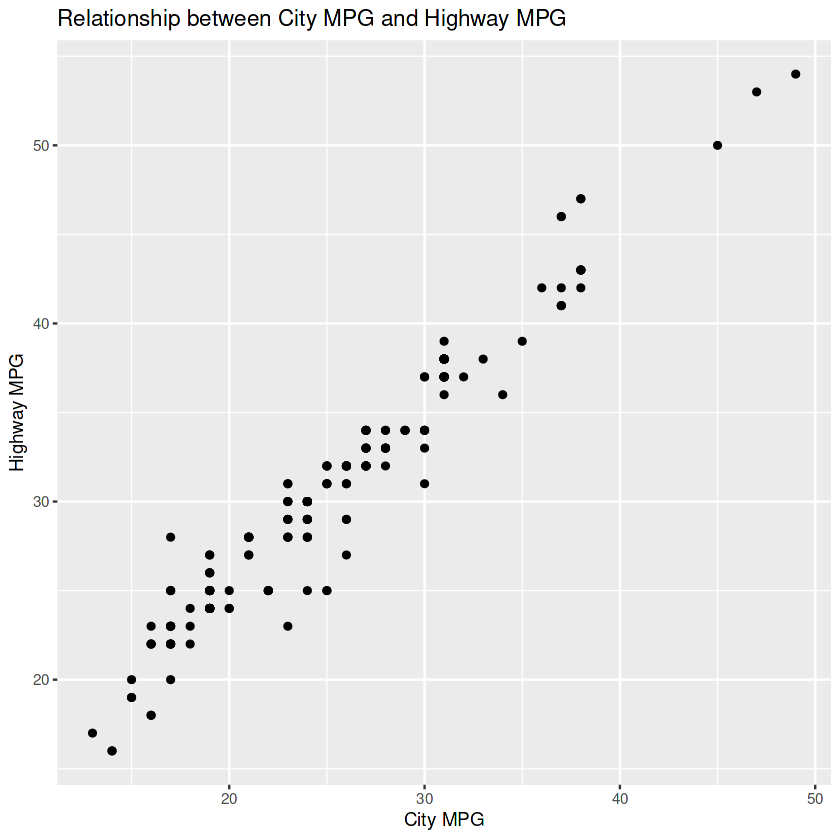

In [12]:
library(ggplot2)

ggplot(carIns_final, aes(x = cityMpg, y = highwayMpg)) +
  geom_point() +
  labs(x = "City MPG", y = "Highway MPG") +
  ggtitle("Relationship between City MPG and Highway MPG")

**(f) Show the distribution of cars by bodyStyle.**

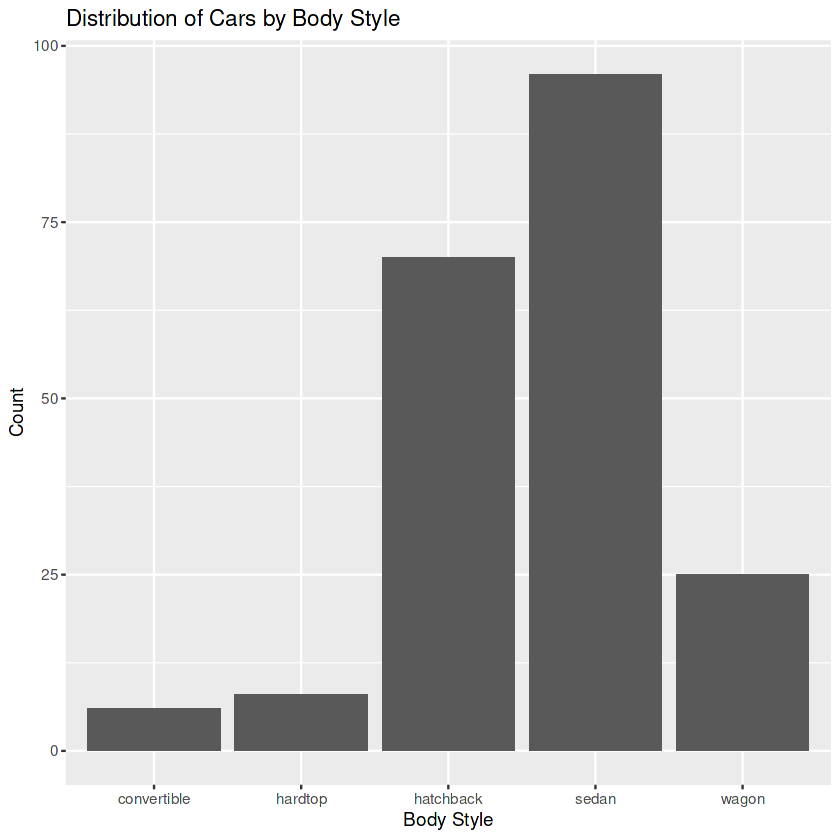

In [13]:
library(ggplot2)

ggplot(carIns_final, aes(x = bodyStyle)) +
  geom_bar() +
  labs(x = "Body Style", y = "Count") +
  ggtitle("Distribution of Cars by Body Style")

**(g) Show the distribution of cars by price. Suggestion: create bins of width equal to 5000**

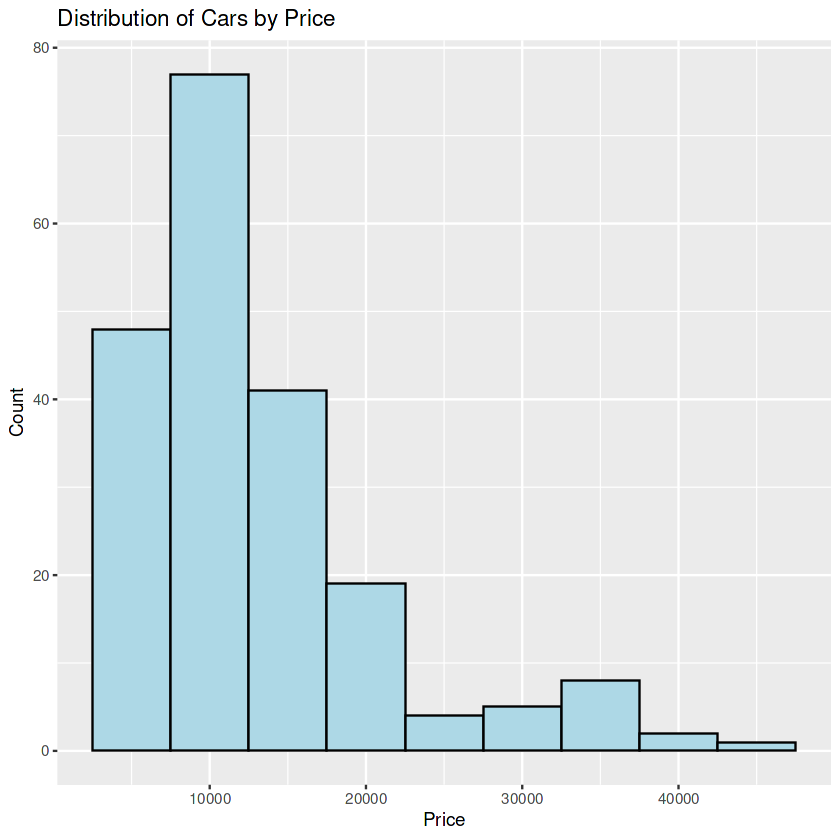

In [14]:
library(ggplot2)

ggplot(carIns_final, aes(x = price)) +
  geom_histogram(binwidth = 5000, color = "black", fill = "lightblue") +
  labs(x = "Price", y = "Count") +
  ggtitle("Distribution of Cars by Price")

**(h) Add the information of the density estimation to the previous graph.**

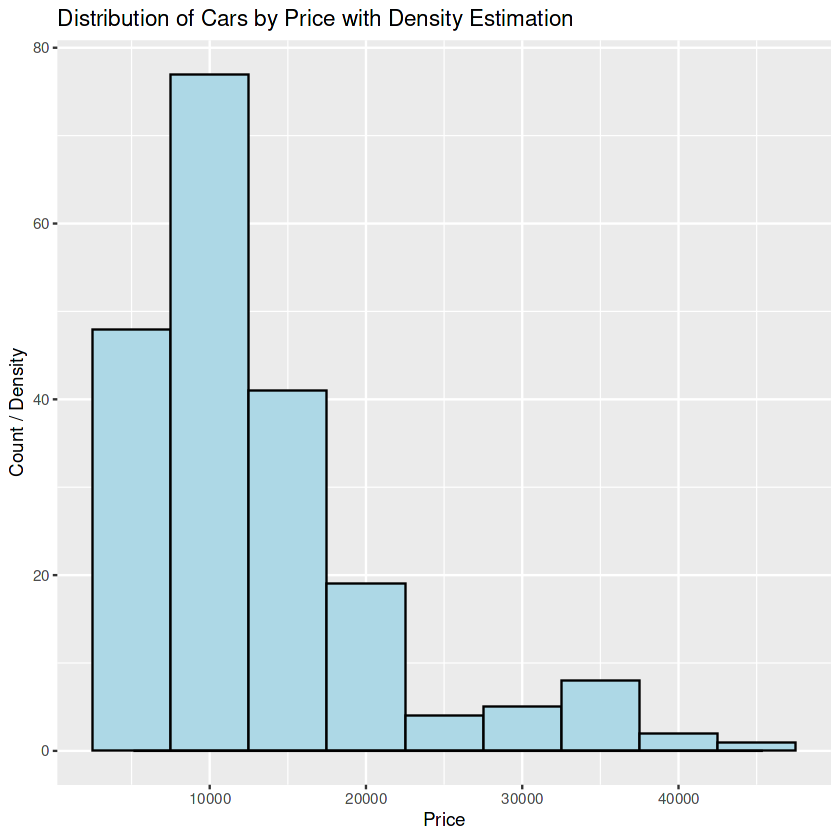

In [15]:
library(ggplot2)

ggplot(carIns_final, aes(x = price)) +
  geom_histogram(binwidth = 5000, color = "black", fill = "lightblue") +
  geom_density(alpha = 0.5, fill = "lightgreen") +
  labs(x = "Price", y = "Count / Density") +
  ggtitle("Distribution of Cars by Price with Density Estimation")

**(i) Check (visually) if it is plausible to consider that price follows a normal distribution.**

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


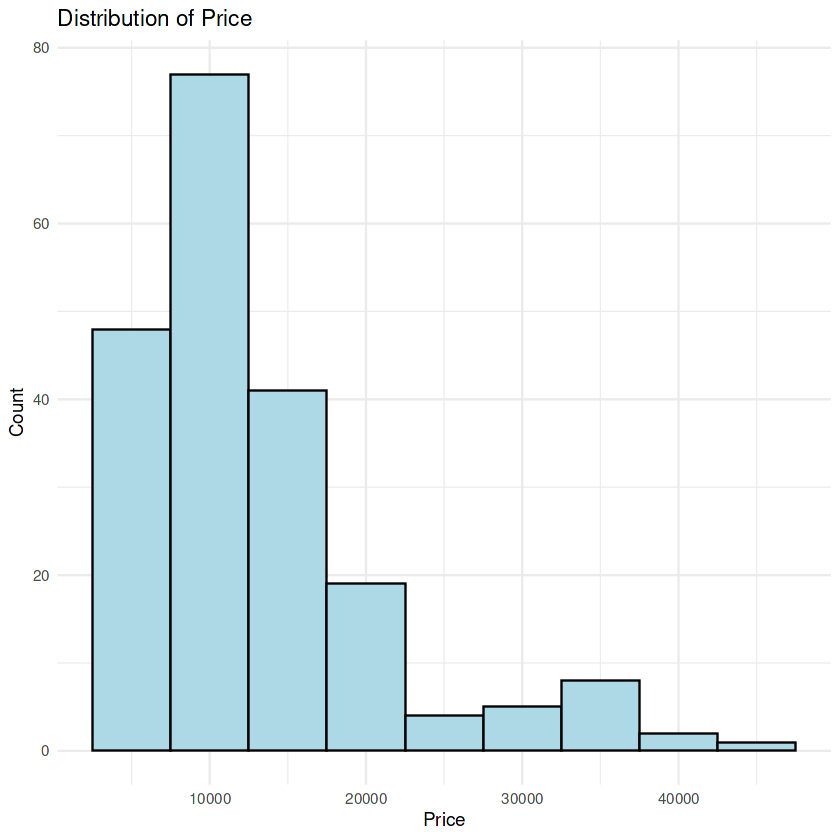

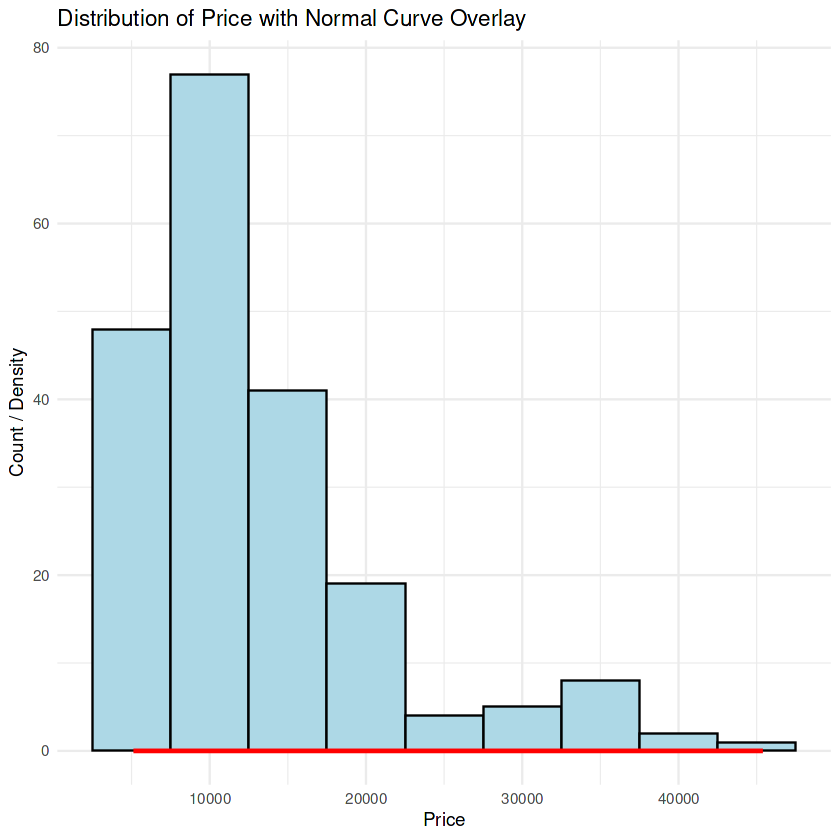

In [22]:
library(ggplot2)

ggplot(carIns_final, aes(x = price)) +
  geom_histogram(binwidth = 5000, color = "black", fill = "lightblue") +
  labs(x = "Price", y = "Count") +
  ggtitle("Distribution of Price") +
  theme_minimal()

ggplot(carIns_final, aes(x = price)) +
  geom_histogram(binwidth = 5000, color = "black", fill = "lightblue") +
  stat_function(fun = dnorm, args = list(mean = mean(carIns_final$price), sd = sd(carIns_final$price)),
                color = "red", size = 1) +
  labs(x = "Price", y = "Count / Density") +
  ggtitle("Distribution of Price with Normal Curve Overlay") +
  theme_minimal()

**(j) Show the distribution of price by make attribute. Suggestion: use boxplots and the function coord_flip().**

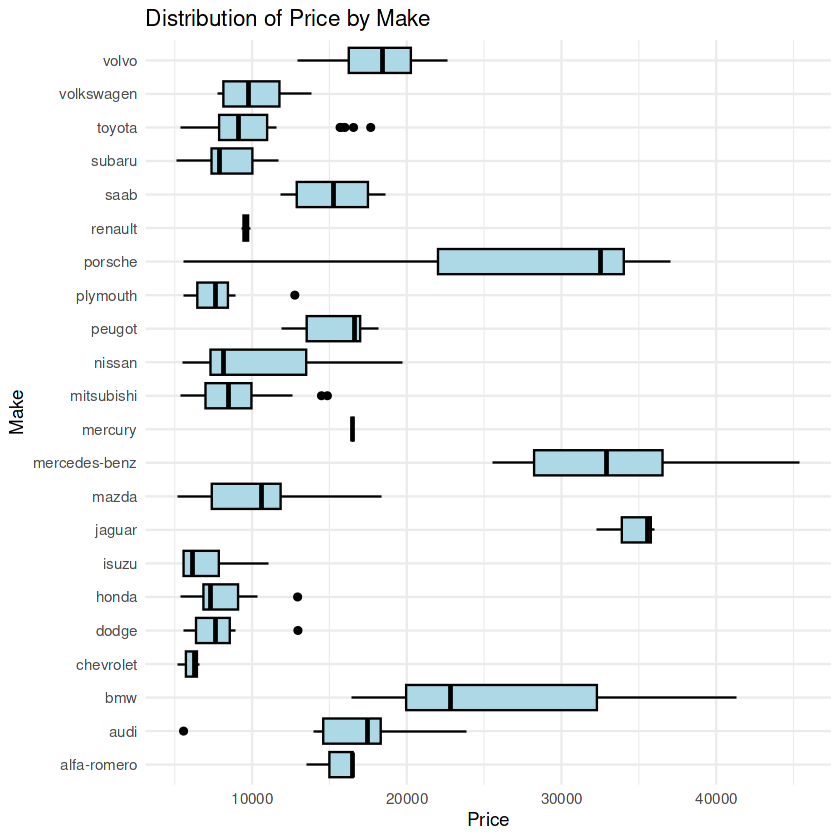

In [23]:
library(ggplot2)

ggplot(carIns_final, aes(x = make, y = price)) +
  geom_boxplot(fill = "lightblue", color = "black") +
  coord_flip() +
  labs(x = "Make", y = "Price") +
  ggtitle("Distribution of Price by Make") +
  theme_minimal()

**(k) Show the distribution of price by nDoors attribute. Suggestion: use histograms.**

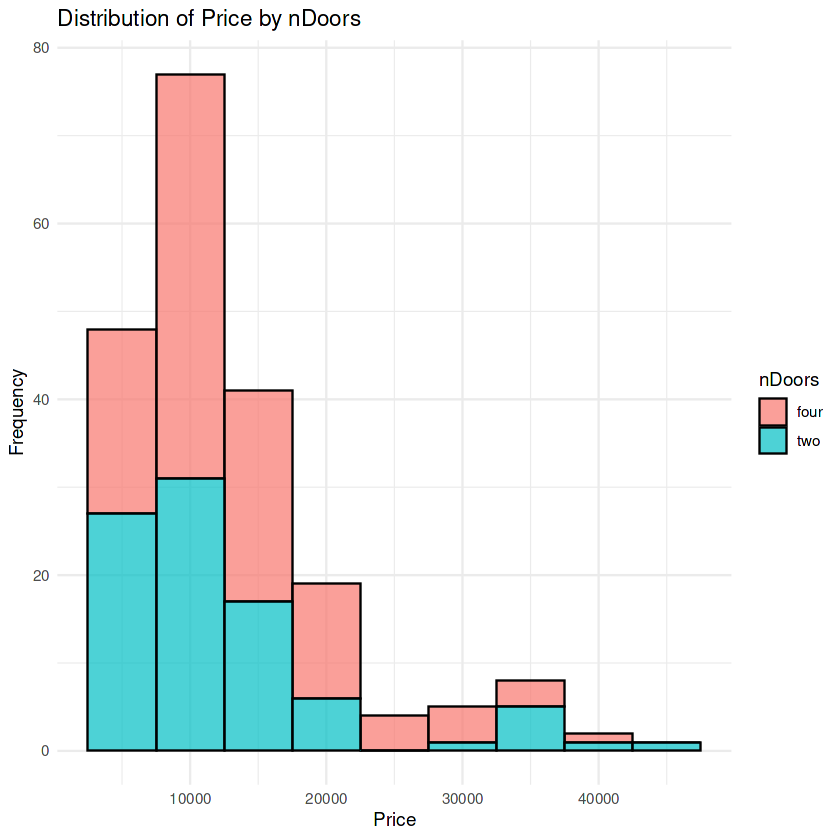

In [24]:
library(ggplot2)

ggplot(carIns_final, aes(x = price, fill = nDoors)) +
  geom_histogram(binwidth = 5000, color = "black", alpha = 0.7) +
  labs(x = "Price", y = "Frequency", fill = "nDoors") +
  ggtitle("Distribution of Price by nDoors") +
  theme_minimal()

**(l) Show the distribution of price by bodyStyle and nDoors attributes. Suggestion: use histograms.**


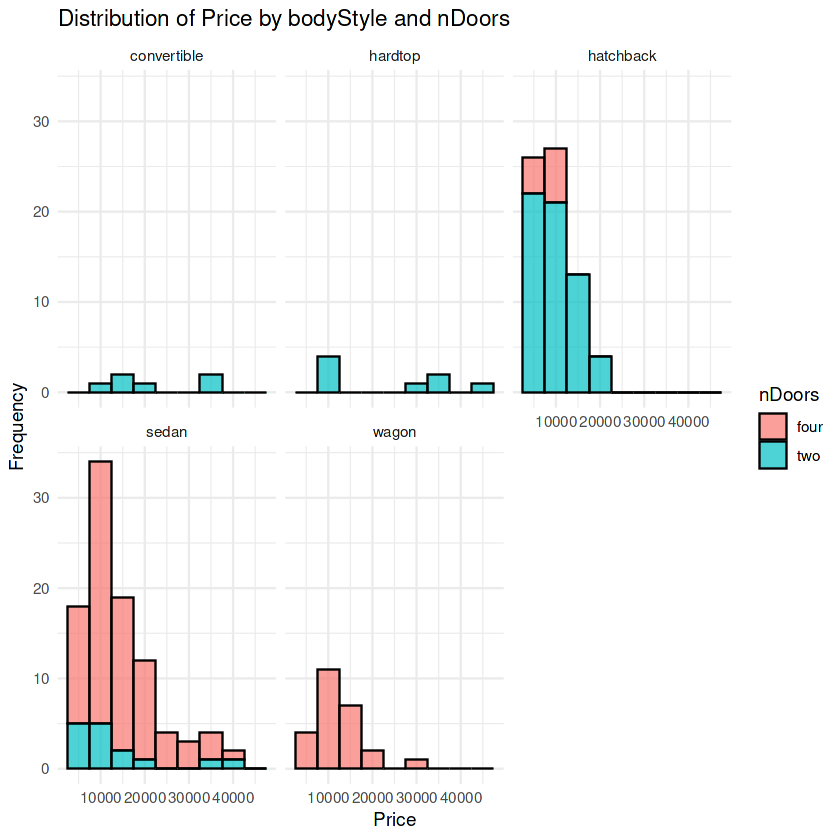

In [25]:
library(ggplot2)

ggplot(carIns_final, aes(x = price, fill = nDoors)) +
  geom_histogram(binwidth = 5000, color = "black", alpha = 0.7) +
  facet_wrap(~bodyStyle) +
  labs(x = "Price", y = "Frequency", fill = "nDoors") +
  ggtitle("Distribution of Price by bodyStyle and nDoors") +
  theme_minimal()

**(m) Add the parameter scales="free_y" to the facet function in the previous graph.**

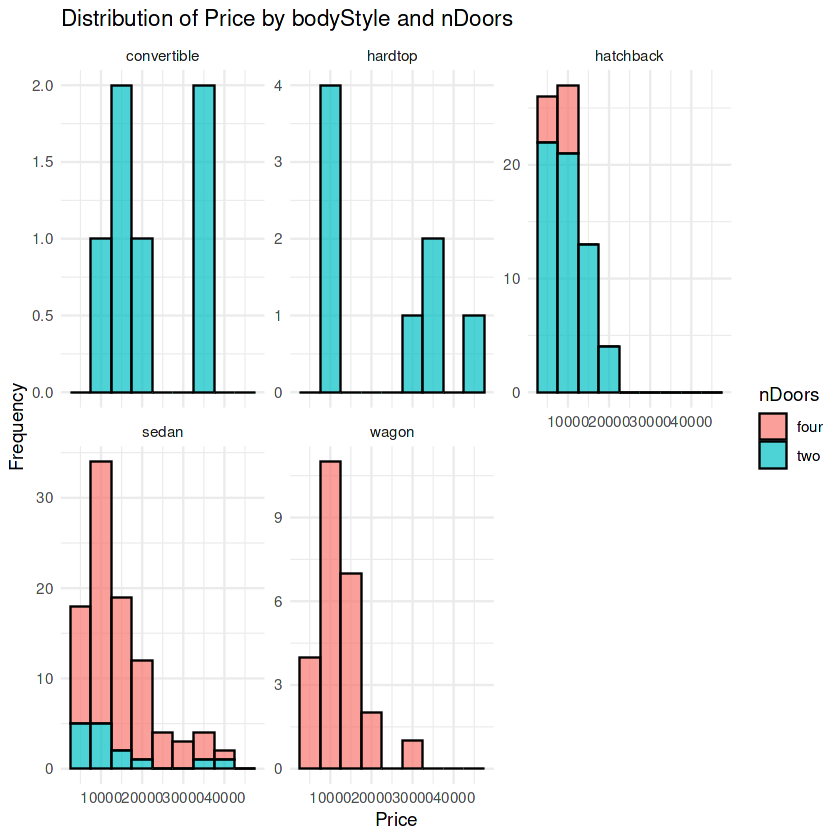

In [26]:
library(ggplot2)

ggplot(carIns_final, aes(x = price, fill = nDoors)) +
  geom_histogram(binwidth = 5000, color = "black", alpha = 0.7) +
  facet_wrap(~bodyStyle, scales = "free_y") +
  labs(x = "Price", y = "Frequency", fill = "nDoors") +
  ggtitle("Distribution of Price by bodyStyle and nDoors") +
  theme_minimal()